# Cointegration Example in time series

Example 3.1 from the book "Likelihood-Based-Inference-Cointegrated-Autoregressive-Econometrics"

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [176]:
mu, sigma = 0, 1 # mean and standard deviation
n = 10000
s1 = np.random.normal(mu, sigma, n)
s2 = np.random.normal(mu, sigma, n)
s3 = np.random.normal(mu, sigma, n)

/home/ivan/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


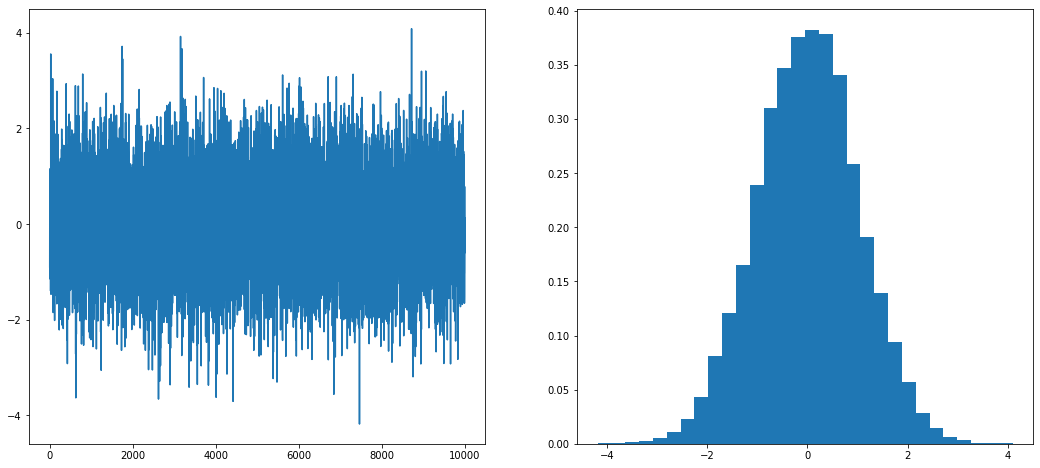

In [177]:
s = s1
plt.figure(1)
plt.subplot(121)
plt.plot(s)
plt.subplot(122)
plt.hist(s, 30, normed=True)
plt.show()

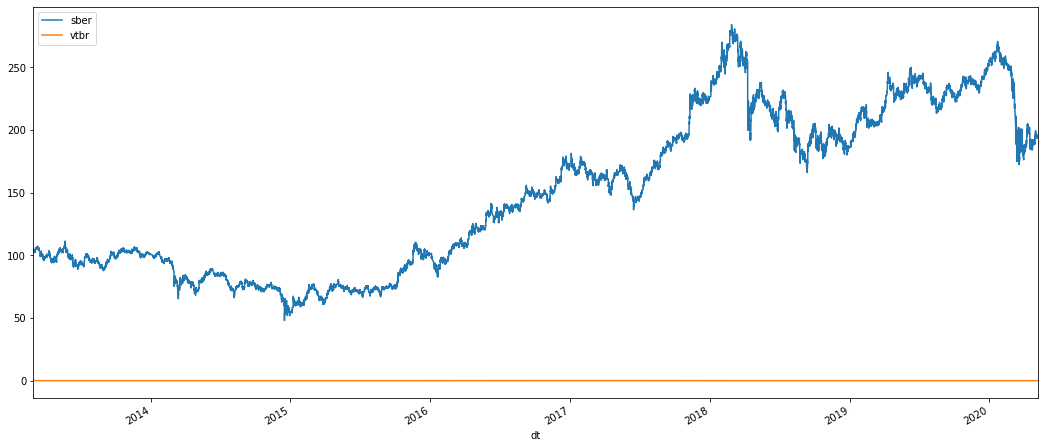

In [178]:
import sqlite3

import pandas as pd

from statsmodels.tsa.vector_ar.vecm import coint_johansen



pd.set_option('display.float_format', lambda x: '%.3f' % x)


mdcnx = sqlite3.connect("/ddisk/globaldatabase/md/MOEX/Min10.db")

def getDf(t0: str, t1 : str ):
    tmp : pd.DataFrame =pd.read_sql_query(f'select a.dt, a.c as {t0}, b.c as {t1} from {t0} a, {t1} b where a.dt = b.dt ',con=mdcnx)
    tmp.set_index(pd.to_datetime(tmp.dt, unit='ms'), inplace=True)
    tmp.drop(columns=['dt'], inplace=True)
    return tmp


y=getDf('sber', 'vtbr')





y.plot()




## Augmented Dickey Fuller test

In [179]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):
    """ Augmented Dickey Fuller test

    Parameters
    ----------
    v: ndarray matrix
        residuals matrix

    Returns
    -------
    bool: boolean
        true if v pass the test 
    """

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print(adf)
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

# Testing Unit root

In [180]:
# print(ADF(y.sber))   # unit root hypothesis can't be rejected
# print(ADF(np.diff(y.sber)))
# print(ADF(y.sberp))   # unit root hypothesis can't be rejected

## Johansen function

In [181]:
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 0, p)
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values
        print(tsignf)
        print(trstat)
        r = 1

        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        jres.r = r
        jres.evecr = jres.evec[:, :r]

        return jres

In [182]:
p=1
jres=get_johansen(y,p)
print(f'There are {jres.r}cointegration vectors')
v1=jres.evecr[:,0]

print(v1)




[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[7.6520118  1.11931306]
There are 1cointegration vectors
[-1.29251579e-02 -6.79824763e+01]


/home/ivan/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


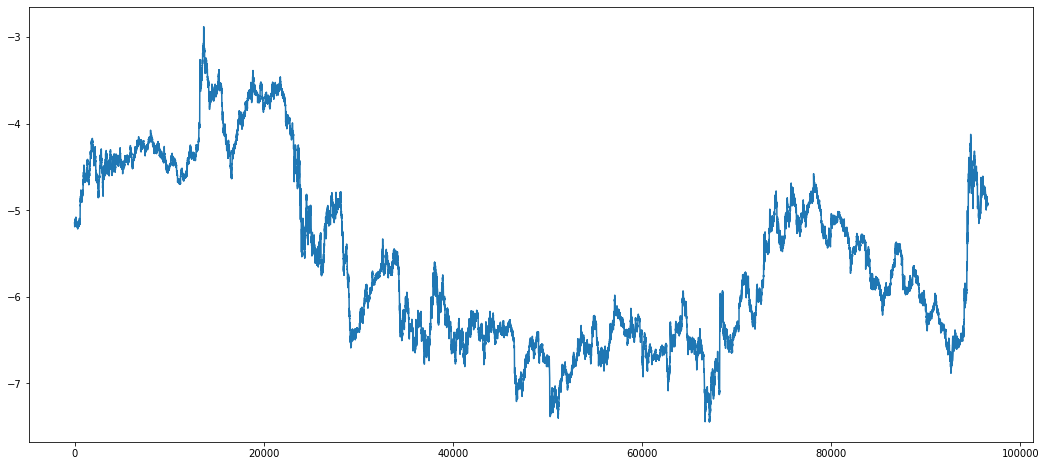

In [183]:
# If we apply vector v1 we get a I(0) time series
plot(np.dot(y.as_matrix(),v1))


Even though we were expecting [0.5 -1 0] y [0 0 1] these vectors are in the same vector space. If we divide every vector by their second component we will get some similar results.